<a href="https://colab.research.google.com/github/Nahom32/CV-Lab-Experiments/blob/main/notebooks/Chapter10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision.transforms as transforms
from PIL import Image
from torchvision import models
import matplotlib.pyplot as plt

In [6]:
# Load pretrained model
model = models.resnet18(pretrained=True)
model.eval()

# Image preprocessing
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
img = Image.open('/content/drive/MyDrive/dog.jpeg')
img_tensor = transform(img).unsqueeze(0)

# Predict
with torch.no_grad():
    output = model(img_tensor)
    _, predicted = torch.max(output, 1)

print('Predicted class index:', predicted.item())

Predicted class index: 167


In [9]:
# Code from Section 4 (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

model = MobileNetV2(weights='imagenet')

img = image.load_img('/content/drive/MyDrive/cat.jpeg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predicted: [('n02124075', 'Egyptian_cat', np.float32(0.51321775)), ('n02123045', 'tabby', np.float32(0.18549478)), ('n02123159', 'tiger_cat', np.float32(0.12752797))]


In [13]:
import cv2

img = cv2.imread('/content/drive/MyDrive/smiling_face.jpeg')
img = cv2.resize(img, (224, 224))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img = np.expand_dims(img, axis=0)
x_new = image.img_to_array(img)
x_new = np.expand_dims(x_new, axis=0)
x_new = preprocess_input(x_new)
preds_test = model.predict(x_new)
print("predicted:" , decode_predictions(preds_test, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
predicted: [('n03630383', 'lab_coat', np.float32(0.33232632)), ('n03595614', 'jersey', np.float32(0.079895996)), ('n02786058', 'Band_Aid', np.float32(0.028896453))]


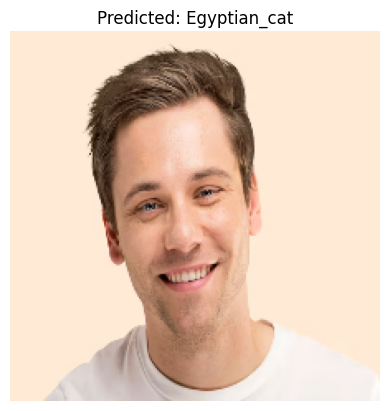

In [14]:
# Code from Section 6 (Visualization - TensorFlow/Keras version)
plt.imshow(img)
plt.title(f"Predicted: {decode_predictions(preds, top=1)[0][0][1]}")
plt.axis('off')
plt.show()